In [1]:
import pandas
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [2]:
data = pd.read_csv('./Mushroom_dataset', delimiter = ",", names=['class-label','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])

In [3]:
data.head()

,class-label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [4]:
le = preprocessing.LabelEncoder()
for column_name in data.columns:
    data[column_name]=le.fit_transform(data[column_name])
Y=data.iloc[:, 0:1].values.ravel()
X=data.iloc[:, 1:23]

In [5]:
# процент пропусков в данных
for d in data.columns:
    print(d, "--", data[d].isna().sum() / len(data[d]) * 100, "%")

class-label -- 0.0 %
cap-shape -- 0.0 %
cap-surface -- 0.0 %
cap-color -- 0.0 %
bruises -- 0.0 %
odor -- 0.0 %
gill-attachment -- 0.0 %
gill-spacing -- 0.0 %
gill-size -- 0.0 %
gill-color -- 0.0 %
stalk-shape -- 0.0 %
stalk-root -- 0.0 %
stalk-surface-above-ring -- 0.0 %
stalk-surface-below-ring -- 0.0 %
stalk-color-above-ring -- 0.0 %
stalk-color-below-ring -- 0.0 %
veil-type -- 0.0 %
veil-color -- 0.0 %
ring-number -- 0.0 %
ring-type -- 0.0 %
spore-print-color -- 0.0 %
population -- 0.0 %
habitat -- 0.0 %


In [6]:
clf = RandomForestClassifier(criterion='entropy', random_state=0)
clf.fit(X, Y)

RandomForestClassifier(criterion='entropy', random_state=0)

<AxesSubplot:>

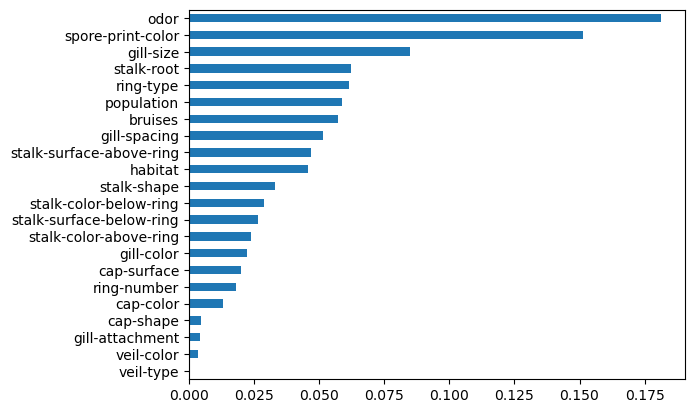

In [7]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=True)
feat_importances.plot(kind='barh')

In [8]:
data.drop(columns=["veil-color","veil-type","gill-attachment","cap-shape",
                   "cap-color", "bruises"], inplace=True)
#for d in data.columns:
#    if d != 'class-label':
#        if feat_importances[d] < 0.04:
#            data.drop(columns=[d], inplace=True)
#            print(d)
#data.drop(columns=['bruises'], inplace=True) # неописательные признак 'повреждения'

In [9]:
e = len(data.columns)
print(e)

17


In [10]:
data = np.array(data)

In [11]:
inputs, targets = data[:,1:],data[:,0]

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
plt.rcParams["figure.figsize"] = (20,6)
rng = np.random.default_rng(51)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(inputs, targets, test_size=0.33, random_state=42)

In [14]:
print(Y_test)

[1 1 0 ... 0 0 0]


In [15]:
def mse(y_pred, y):
  return np.mean(np.square(y_pred - y))

def dmse(y_pred, y):
  n = y.shape[1]
  return (2/n)*(y_pred - y)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1.0 - sigmoid(x))

100%|██████████████████████████████████████| 1000/1000 [00:07<00:00, 128.30it/s]


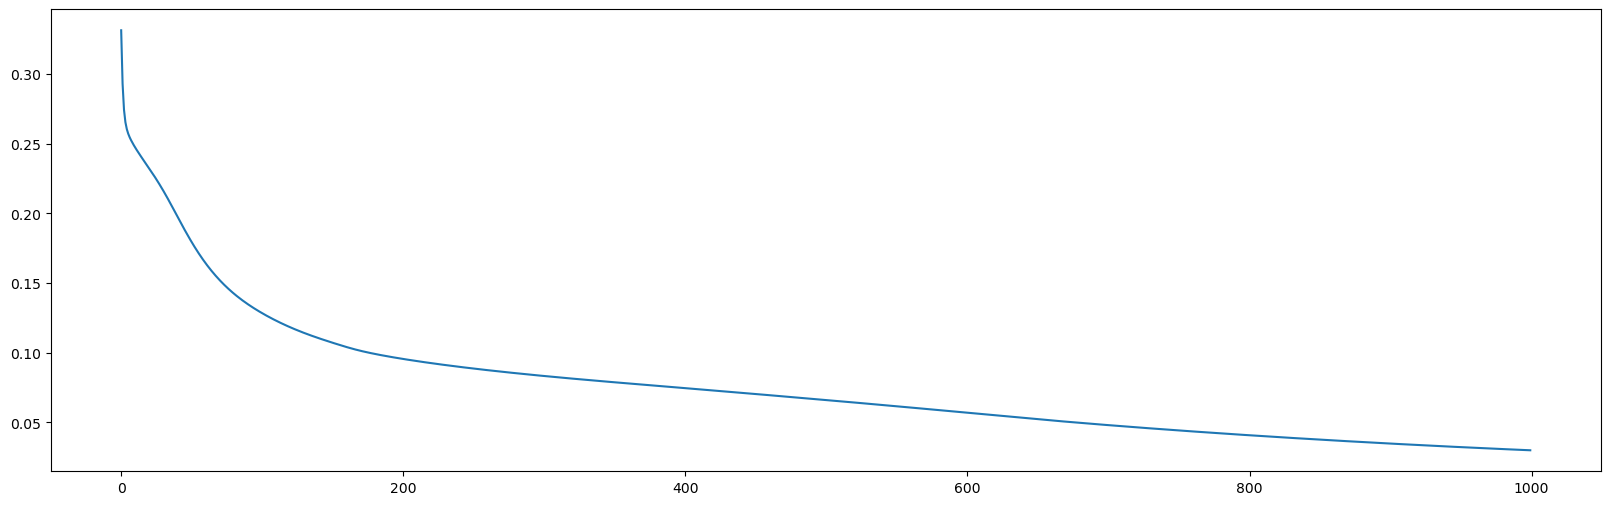

Test data Accuracy = 0.9593232541396688
Test data Precision = 0.9530516431924883
Test data Recall = 0.9583005507474429
Test data F1 score = 0.9556688897606904
[1. 1. 0. ... 0. 0. 0.]


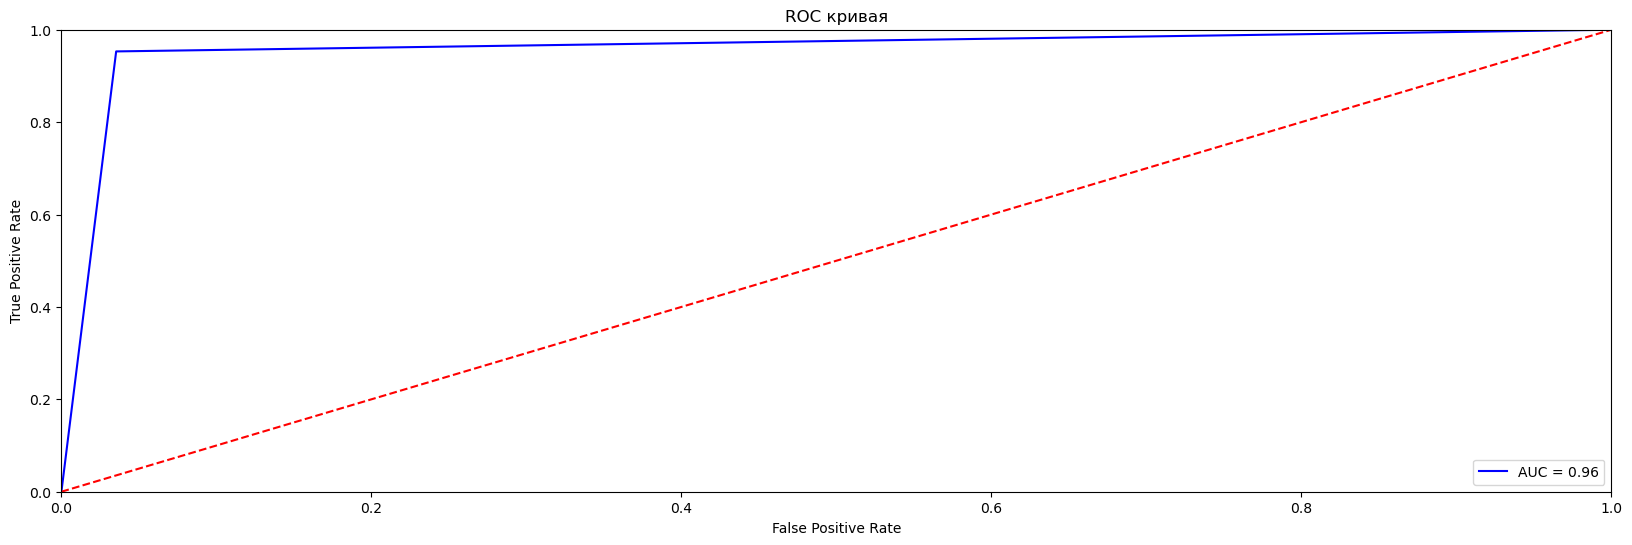

In [18]:
def init_w():
    layer_inputs = (e-1,10,1)
    # np.random.seed(42)

    num_of_inputs = layer_inputs[0]
    num_of_outputs = layer_inputs[-1]

    limit = 1 *  np.sqrt(6. / (num_of_inputs + num_of_outputs))
  
    w1 = np.random.uniform(-limit, limit, size=(layer_inputs[1], layer_inputs[0]))
    b1 = np.random.uniform(-limit, limit, size=(layer_inputs[1], 1))
    w2 = np.random.uniform(-limit, limit, size=(layer_inputs[2], layer_inputs[1]))
    b2 = np.random.uniform(-limit, limit, size=(layer_inputs[2], 1))

    return w1,b1,w2,b2
    
def forward(W1, b1, W2, b2, X):
    Z1 = W1.dot(X.T) + b1
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    #A2 = Z2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2
    
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    Y=Y.reshape(1,-1)
    dA2 = dmse(A2,Y)
    dZ2 = dA2 * 1
    dW2 = dZ2.dot(A1.T)
    db2 =  np.sum(dZ2)
    dA1 = W2.T.dot(dZ2)  #z_2 = w_2*a_1+b_2  ==> dz_2/da_1 = w_2
    dZ1 = dA1 * sigmoid_derivative(Z1)                                                                                                                   
    dW1 = dZ1.dot(X)
    db1 =  np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1-= alpha * dW1
    b1-= alpha * db1    
    W2-= alpha * dW2  
    b2-= alpha * db2    
    return W1, b1, W2, b2


def train(X, Y, alpha, iterations):
    losses= []
    W1, b1, W2, b2 = init_w()
    for i in tqdm(range(iterations)):
        Z1, A1, Z2, A2 = forward(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        losses.append(mse(A2.flatten(),Y.flatten()))
        if i % 100 == 0:
            #print("Iteration: ", i)
            preds = np.round(A2.flatten())
            Y = Y.flatten()
            N = Y.shape[0]
            accuracy = (Y == preds).sum() / N
            #print("Accuracy: ", accuracy)
            #print("Loss: ", mse(A2.flatten(),Y.flatten()))
    plt.plot(losses) 
    plt.show()
    return W1, b1, W2, b2

def test(X, Y, W1, b1, W2, b2):
    Z1, A1, Z2, A2 = forward(W1, b1, W2, b2, X)
    preds = np.round(A2.flatten())
    Y = Y.flatten()

    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for t, p in zip(Y, preds):
        if t == p:
            if p == 1:
                tp += 1
            else:
                tn += 1
        else:
            if p == 1:
                fn += 1
            else:
                fp += 1
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = (2 * precision*recall)/(precision + recall)

    print(f"Test data Accuracy = {accuracy}")
    print(f"Test data Precision = {precision}")
    print(f"Test data Recall = {recall}")
    print(f"Test data F1 score = {f1_score}")
    print(preds)
    fpr, tpr, threshold = metrics.roc_curve(Y, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('ROC кривая')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

W1, b1, W2, b2 = train(X_train,Y_train,0.10,1000)
test(X_test,Y_test,W1, b1, W2, b2)
